In [37]:
import os
!mkdir -p ~/.kaggle
!mv '/content/kaggle (4).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [38]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
microsoft-catsvsdogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [58]:
!unzip -o microsoft-catsvsdogs-dataset.zip -d cats_vs_dogs

Streaming output truncated to the last 5000 lines.
  inflating: cats_vs_dogs/PetImages/Dog/550.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5500.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5501.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5502.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5503.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5504.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5505.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5506.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5507.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5508.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5509.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/551.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5510.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5511.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5512.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5513.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5514.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5515.jpg  
  inflating: cats_vs_dogs/PetImag

In [40]:
import os

# List the contents of the extracted directory
print(os.listdir('cats_vs_dogs'))

# List the contents of the PetImages directory to see the subfolders (Cat and Dog)
print(os.listdir('cats_vs_dogs/PetImages'))

# List a few files from the 'Cat' subfolder as an example
print(os.listdir('cats_vs_dogs/PetImages/Cat')[:5])
print(os.listdir('cats_vs_dogs/PetImages/Dog')[:5])

['MSR-LA - 3467.docx', 'PetImages', 'readme[1].txt']
['Cat', 'Dog']
['1073.jpg', '7249.jpg', '1069.jpg', '10030.jpg', '5981.jpg']
['1073.jpg', '7249.jpg', '1069.jpg', '10030.jpg', '5981.jpg']


In [41]:
import zipfile
import os

zip_path = "microsoft-catsvsdogs-dataset.zip"  # Name of the uploaded file
extract_path = "/content/microsoft-catsvsdogs-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['MSR-LA - 3467.docx', 'PetImages', 'readme[1].txt']

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D , MaxPooling2D, Flatten, BatchNormalization, Dropout

Cleaning Corrupted Images
The error suggests that some image files are corrupted or have an unexpected number of channels. This is a common issue with the 'Cats vs Dogs' dataset. The following code will iterate through the image directories, attempt to open each image using PIL (Pillow library), and remove any files that cause an error during loading. This will ensure that image_dataset_from_directory only processes valid image files.

In [53]:
import os
from PIL import Image

# Define the base directory for the images
base_dir = 'cats_vs_dogs/PetImages'

# Define categories (subfolders)
categories = ['Cat', 'Dog']

corrupted_files_count = 0

for category in categories:
    path = os.path.join(base_dir, category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        # Check for zero-byte files first, which are common culprits
        if os.path.getsize(img_path) == 0:
            print(f"Deleting zero-byte file: {img_path}")
            os.remove(img_path)
            corrupted_files_count += 1
            continue # Move to the next file

        try:
            img = Image.open(img_path)
            img.verify() # Verify the image content, header, etc.
            img.convert('RGB') # Attempt to convert to RGB to catch channel-related issues
        except Exception as e:
            print(f"Deleting corrupted file: {img_path} - Error: {e}")
            os.remove(img_path)
            corrupted_files_count += 1

print(f"\nFinished cleaning. Total corrupted files removed: {corrupted_files_count}")
print("Please re-run cells GVWMorocjO1D and 5viIsaqEutrI to re-create the datasets from the cleaned images.")

Streaming output truncated to the last 5000 lines.
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/9149.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/10559.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/5713.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/4466.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/10360.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/4864.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/5567.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/8076.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Deleting corrupted file: cats_vs_dogs/PetImages/Dog/6185.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/4800.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/9073.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/5402.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/9382.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/5127.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/12021.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/5222.jpg - Error: 'NoneType' object has no attribute 'seek'
Deleting corrupted file: cats_vs_dogs/PetImages/Dog/4789.jpg - Error: 'NoneType' object has no attribut

In [59]:
# generator
train_ds= keras.utils.image_dataset_from_directory(
    directory = 'cats_vs_dogs/PetImages',
    labels = 'inferred',
    label_mode= 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds=keras=keras.utils.image_dataset_from_directory(
    directory = 'cats_vs_dogs/PetImages',
    labels = 'inferred',
    label_mode= 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 25000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [60]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [61]:
# CRetae  CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [67]:
import cv2

In [79]:
test_image=cv2.imread("/content/dog.webp")

In [80]:
import matplotlib.pyplot as plt


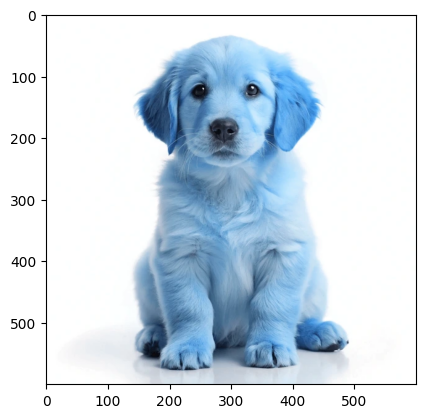

In [81]:
plt.imshow(test_image)

In [82]:
test_image.shape

(600, 600, 3)

In [83]:
test_image=cv2.resize(test_image,(256,256))

In [84]:
test_input= test_image.reshape((1,256,256,3))

In [85]:
model.predict_step(test_input)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>